In [45]:
#Import All Required Libraries

# Data Handling & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
import importlib, Capstone_Group_03
importlib.reload(Capstone_Group_03)
from Capstone_Group_03 import load_and_clean
from Capstone_Group_03 import load_and_clean, split_data, evaluate_model, cross_validate_model

df = load_and_clean("kc_house_data.csv")
print(df.shape)



(21560, 25)


In [47]:
#Import and Load Dataset
# Import libraries
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#import importlib
#from Capstone_Group_03 import load_and_clean, split_data, evaluate_model, cross_validate_model

# Load dataset
df = load_and_clean("kc_house_data.csv")

# Preview data
display(df.head())
display(df[['price', 'house_age', 'sale_year', 'sale_month']].head())

# Basic info
print(df.shape)
print(df.isnull().sum().head())
print(df[['bedrooms', 'bathrooms', 'floors']].max())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,60,12.309987
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,64,13.195616
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,82,12.100718
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,50,13.311331
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,28,13.142168


,price,house_age,sale_year,sale_month
0,221900.0,60,2014,10
1,538000.0,64,2014,12
2,180000.0,82,2015,2
3,604000.0,50,2014,12
4,510000.0,28,2015,2


(21560, 25)
id           0
date         0
price        0
bedrooms     0
bathrooms    0
dtype: int64
bedrooms     10.0
bathrooms     6.0
floors        3.5
dtype: float64


                 id                           date         price  \
count  2.156000e+04                          21560  2.156000e+04   
mean   4.581043e+09  2014-10-29 05:49:26.827458304  5.327432e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.500000e+04   
25%    2.123049e+09            2014-07-22 00:00:00  3.209750e+05   
50%    3.904940e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.308900e+09            2015-02-17 00:00:00  6.410000e+05   
max    9.900000e+09            2015-05-27 00:00:00  3.000000e+06   
std    2.876241e+09                            NaN  3.290498e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21560.000000  21560.000000  21560.000000  2.156000e+04  21560.000000   
mean       3.365677      2.108407   2069.548840  1.506808e+04      1.493321   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.040000e+03      1.00

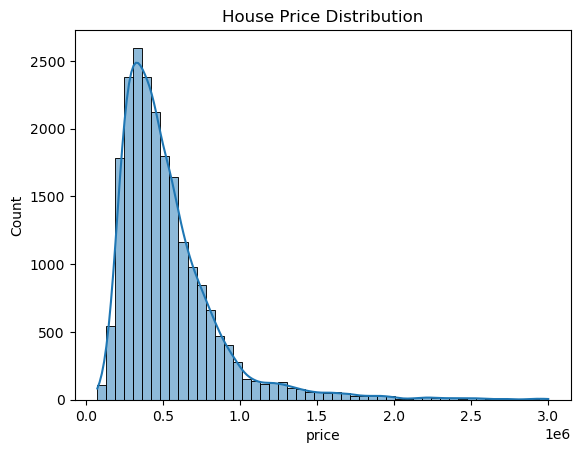

In [48]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())
print(df.info())

# Missing values
print(df.isnull().sum())

# Price distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

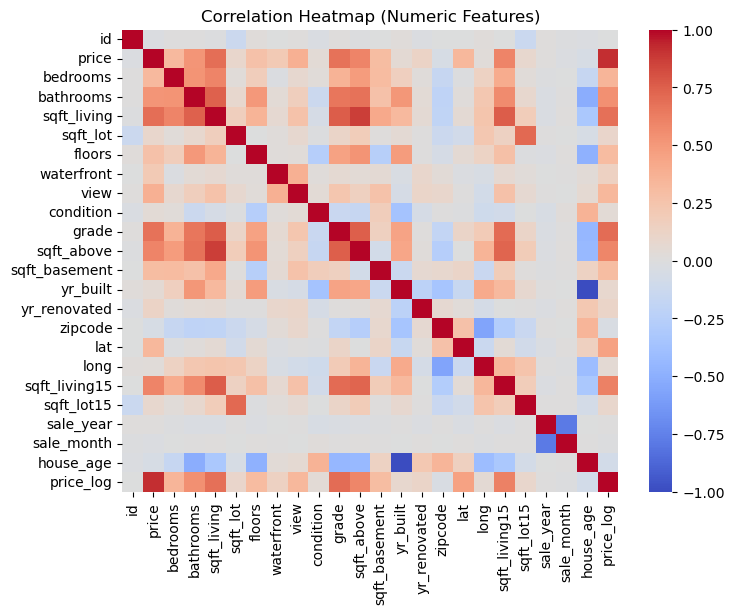

In [49]:
# Correlation heatmap (numeric columns)
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

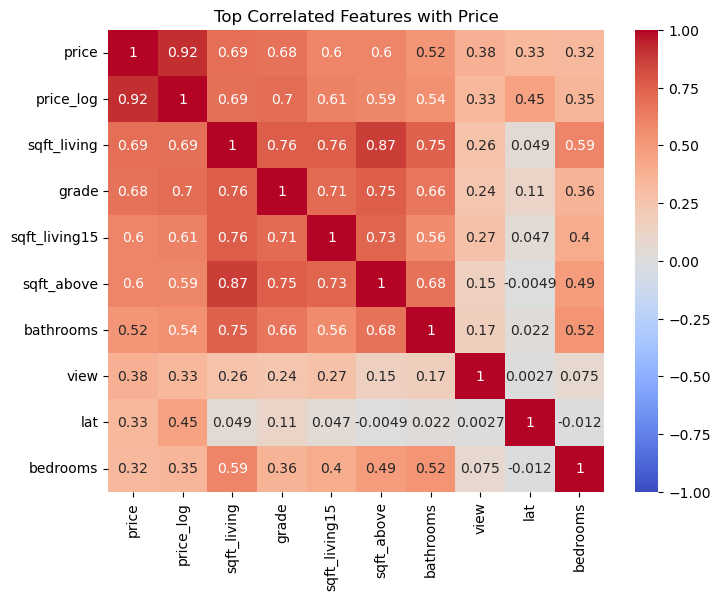

Top positive correlations with price:
price            1.000000
price_log        0.921175
sqft_living      0.691050
grade            0.679058
sqft_living15    0.601473
sqft_above       0.596497
bathrooms        0.516808
view             0.379415
lat              0.332455
bedrooms         0.320661
Name: price, dtype: float64

Most negative correlations with price:
sale_year     0.008324
sale_month   -0.015645
id           -0.020719
zipcode      -0.048095
house_age    -0.052853
Name: price, dtype: float64


In [50]:
# Top correlated features with price
corr_matrix = df[num_cols].corr()
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr].corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title("Top Correlated Features with Price")
plt.show()

# Show top and bottom correlations
corr_with_price = df[num_cols].corr()['price'].sort_values(ascending=False)
print("Top positive correlations with price:")
print(corr_with_price.head(10))
print("\nMost negative correlations with price:")
print(corr_with_price.tail(5))


/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/3002291197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="coolwarm")


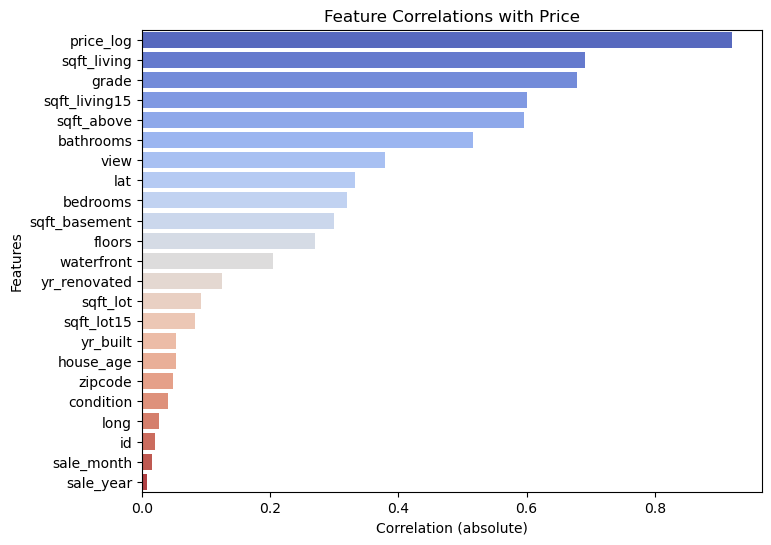

In [51]:
# Bar chart for feature correlations
corr_sorted = corr_with_price.abs().drop('price').sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="coolwarm")
plt.title("Feature Correlations with Price")
plt.xlabel("Correlation (absolute)")
plt.ylabel("Features")
plt.show()


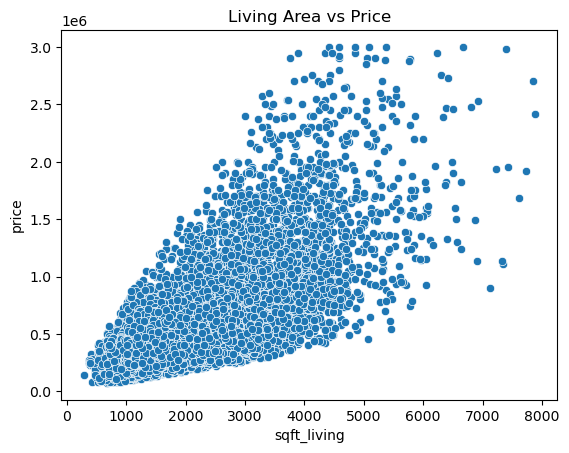

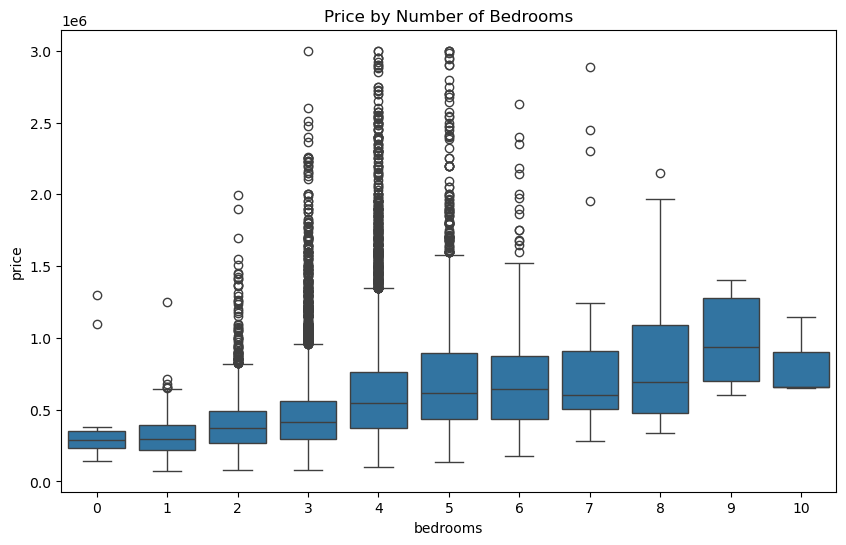

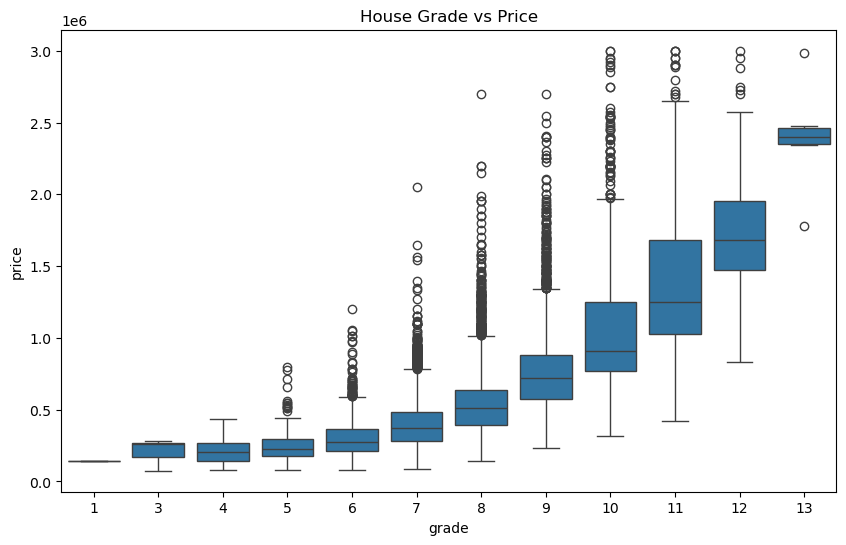

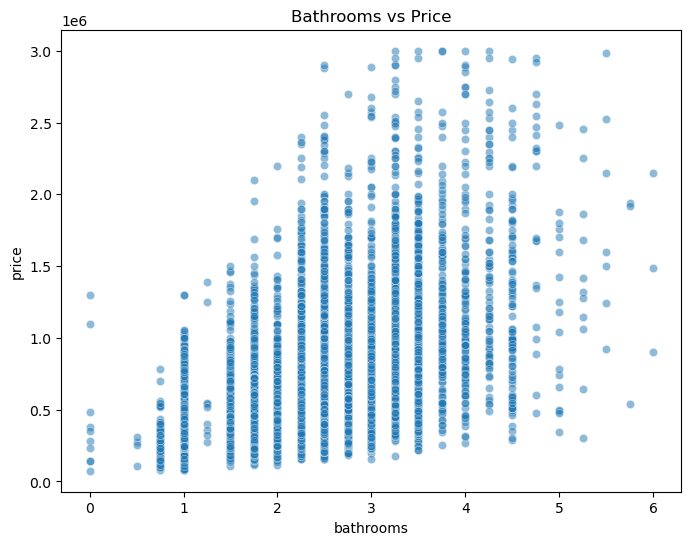

In [52]:
# Scatter & boxplots
sns.scatterplot(x="sqft_living", y="price", data=df)
plt.title("Living Area vs Price")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price by Number of Bedrooms")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="grade", y="price", data=df)
plt.title("House Grade vs Price")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="bathrooms", y="price", data=df, alpha=0.5)
plt.title("Bathrooms vs Price")
plt.show()

In [53]:
# Data Split for Modeling
# Reload module to ensure latest version is used
#importlib.reload(importlib.import_module('Capstone_Group_03'))
#from Capstone_Group_03 import load_and_clean, split_data, evaluate_model

df = load_and_clean("kc_house_data.csv")

# Define features
features_basic = ["sqft_living", "bedrooms", "bathrooms", "floors", "house_age"]
features_plus = features_basic + [
    "grade", "view", "waterfront", 
    "sqft_above", "sqft_basement", 
    "lat", "long", "sqft_living15"
]

# Split data
X_train, X_test, y_train, y_test = split_data(df[features_plus + ["price"]], "price")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15092, 13)
X_test shape: (6468, 13)
y_train shape: (15092,)
y_test shape: (6468,)


Linear Regression: {'RMSE': np.float64(182562.6162906622), 'R2': 0.7107131290601052}

Intercept: -38093795.79717332

Feature Coefficients:
           Feature    Coefficient
10            lat  549231.943933
7      waterfront  367286.207590
5           grade   97458.461988
6            view   48853.242950
2       bathrooms   44383.426949
3          floors   12826.424798
4       house_age    2755.585562
0     sqft_living      83.382063
8      sqft_above      52.245359
12  sqft_living15      40.549270
9   sqft_basement      31.136705
1        bedrooms  -23162.356562
11           long  -91926.970286

Linear Regression (Log Target): {'RMSE': 176934.301647041 , "R2": 0.7282753146215645 }
          Feature    Coefficient
10            lat  549231.943933
7      waterfront  367286.207590
5           grade   97458.461988
6            view   48853.242950
2       bathrooms   44383.426949
3          floors   12826.424798
4       house_age    2755.585562
0     sqft_living      83.382063
8      sqft_a

/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/1683766515.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


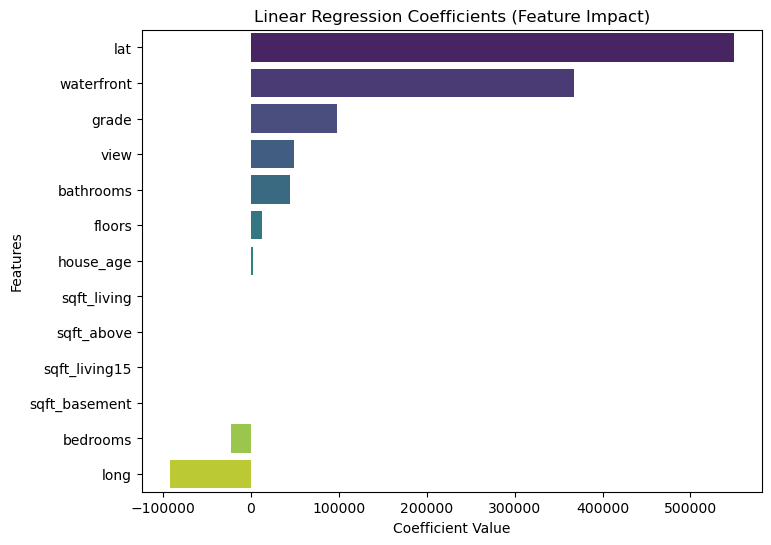


Linear Regression CV R²: 0.694 ± 0.008


In [54]:
# 1. Linear Regression (Baseline Model)
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import KFold, cross_val_score
#import numpy as np
#import pandas as pd

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
results_lr = evaluate_model(lr, X_test, y_test)
print("Linear Regression:", results_lr)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)
print("\nIntercept:", lr.intercept_)
print("\nFeature Coefficients:\n", coef_df)

# Log target variant
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
lr_log = LinearRegression().fit(X_train, y_train_log)
y_pred_log = np.expm1(lr_log.predict(X_test))
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)
print("\nLinear Regression (Log Target): {'RMSE':", rmse_log, ', "R2":', r2_log, '}')

# Check Coefficients (Feature Impact)
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

# Display the coefficient table
print(coef_df)

# Plot coefficients
plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Linear Regression Coefficients (Feature Impact)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Cross-validation (Linear Regression)
cv_results_lr = cross_validate_model(lr, X_train, y_train)
print(f"\nLinear Regression CV R²: {cv_results_lr['CV_Mean']:.3f} ± {cv_results_lr['CV_Std']:.3f}")

Random Forest: {'RMSE': np.float64(124207.61652158931), 'R2': 0.8660935557263088}

Feature Importance (Random Forest):
grade            0.371755
lat              0.199291
sqft_living      0.186224
long             0.079459
sqft_living15    0.042204
house_age        0.041274
sqft_above       0.026508
waterfront       0.016001
view             0.013915
bathrooms        0.008409
sqft_basement    0.006897
bedrooms         0.004481
floors           0.003583
dtype: float64


/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/1359376007.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_rf.values, y=feat_imp_rf.index, palette="crest")


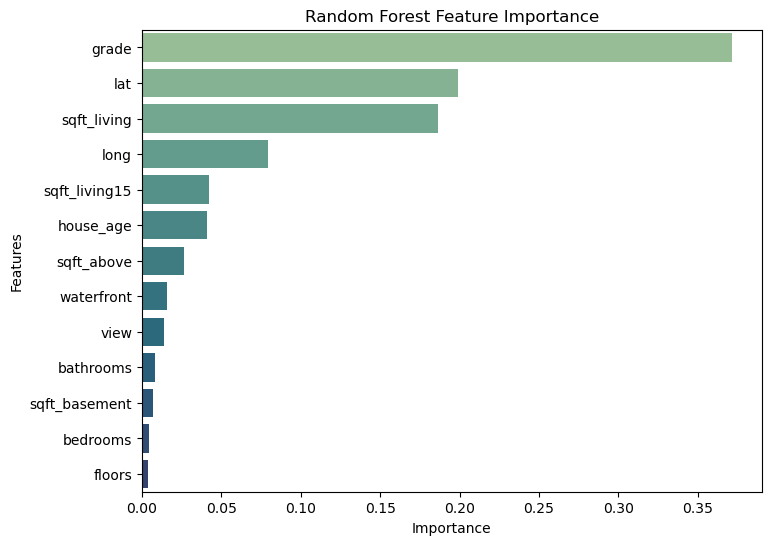


Random Forest CV R²: 0.862 ± 0.010


In [55]:
# 2. Random Forest
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import cross_val_score, KFold
#import pandas as pd
#import numpy as np

# Train the Random Forest model
rf = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate on test set
results_rf = evaluate_model(rf, X_test, y_test)
print("Random Forest:", results_rf)

# Feature importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance (Random Forest):")
print(feat_imp_rf)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp_rf.values, y=feat_imp_rf.index, palette="crest")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 5-fold Cross-Validation (to check model consistency)
cv_results_rf = cross_validate_model(rf, X_train, y_train)
print(f"\nRandom Forest CV R²: {cv_results_rf['CV_Mean']:.3f} ± {cv_results_rf['CV_Std']:.3f}")

XGBoost: {'RMSE': np.float64(112645.61047895494), 'R2': 0.8898629174714832}

Feature Importance (XGBoost):
grade            0.466666
waterfront       0.128675
sqft_living      0.108176
lat              0.085486
view             0.049597
long             0.038433
house_age        0.030867
sqft_living15    0.029545
sqft_above       0.023650
bathrooms        0.013543
sqft_basement    0.010731
floors           0.009181
bedrooms         0.005449
dtype: float32


/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/3933786954.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_xgb.values, y=feat_imp_xgb.index, palette="coolwarm")


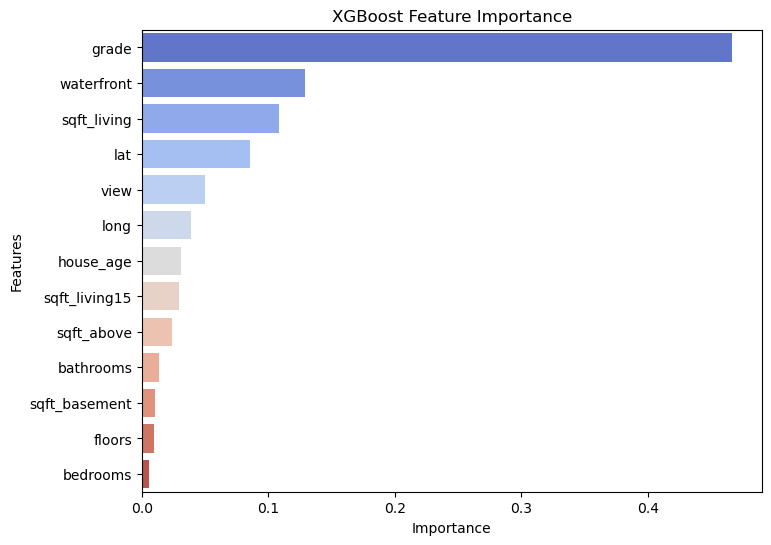


XGBoost CV R²: 0.884 ± 0.005


In [56]:
# 3. XGBoost
#from xgboost import XGBRegressor
#from sklearn.model_selection import cross_val_score, KFold
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# Evaluate
results_xgb = evaluate_model(xgb, X_test, y_test)
print("XGBoost:", results_xgb)

# Feature importance
feat_imp_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance (XGBoost):")
print(feat_imp_xgb)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp_xgb.values, y=feat_imp_xgb.index, palette="coolwarm")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Cross-validation
cv_results_xgb = cross_validate_model(xgb, X_train, y_train)
print(f"\nXGBoost CV R²: {cv_results_xgb['CV_Mean']:.3f} ± {cv_results_xgb['CV_Std']:.3f}")

--- Ridge Regression Performance ---
Test Set R² Score: 0.7107
Test Set RMSE: $182568.54
Cross-Validation Mean R²: 0.6935 (+/- 0.0077)


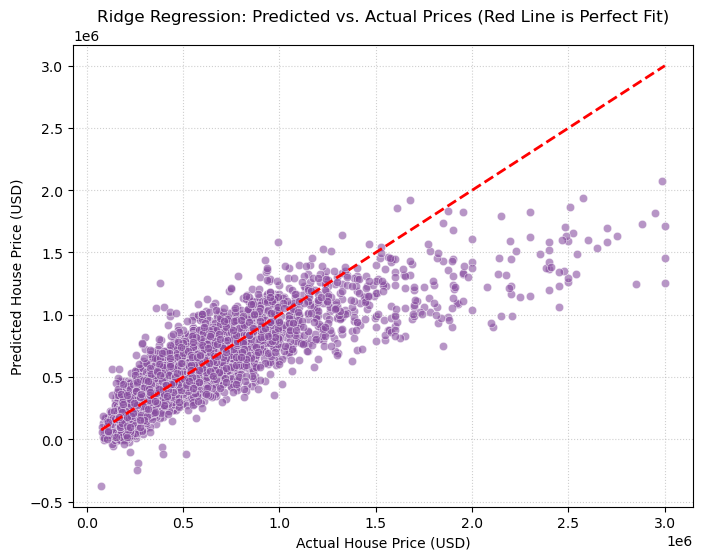

In [60]:
# 4. RIDGE REGRESSION ANALYSIS 
# Ridge Regression is a linear model that adds L2 regularization to prevent overfitting.
# It requires feature scaling for optimal performance.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Scale Data (CRITICAL for Linear Models with Regularization)
# We use StandardScaler to normalize features to have a mean of 0 and std dev of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train Model
# alpha=10.0 sets the regularization strength (hyperparameter).
model_ridge = Ridge(alpha=10.0, random_state=42)
model_ridge.fit(X_train_scaled, y_train)

# 3. Predict and Evaluate
ridge_preds = model_ridge.predict(X_test_scaled)

# Assuming evaluate_model and cross_validate_model are defined in Capstone_Group_03.py
results_ridge = evaluate_model(model_ridge, X_test_scaled, y_test)
cv_results_ridge = cross_validate_model(model_ridge, X_train_scaled, y_train, cv_splits=5)

print("--- Ridge Regression Performance ---")
print(f"Test Set R² Score: {results_ridge['R2']:.4f}")
print(f"Test Set RMSE: ${results_ridge['RMSE']:.2f}")
print(f"Cross-Validation Mean R²: {cv_results_ridge['CV_Mean']:.4f} (+/- {cv_results_ridge['CV_Std']:.4f})")

# 4. Visualization: Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
# Scatter plot of actual prices (x-axis) vs. predicted prices (y-axis)
sns.scatterplot(x=y_test, y=ridge_preds, alpha=0.6, color='#884EA0') 
# Diagonal line (y=x) representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         linestyle='--', color='red', lw=2)
plt.title('Ridge Regression: Predicted vs. Actual Prices (Red Line is Perfect Fit)')
plt.xlabel('Actual House Price (USD)')
plt.ylabel('Predicted House Price (USD)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

,Model,RMSE,R2,CV_Mean,CV_Std
0,Linear Regression,182562.616291,0.710713,0.693523,0.007725
1,Random Forest,124207.616522,0.866094,0.861528,0.010397
2,XGBoost,112645.610479,0.889863,0.884494,0.005306


/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/4025644508.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results, palette="viridis")


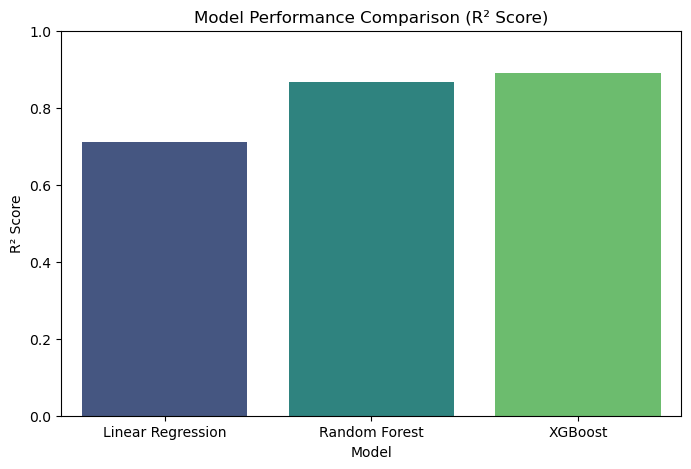

/var/folders/tg/40g23z3j19z8672w69hs9vt80000gn/T/ipykernel_1833/4025644508.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results, palette="magma")


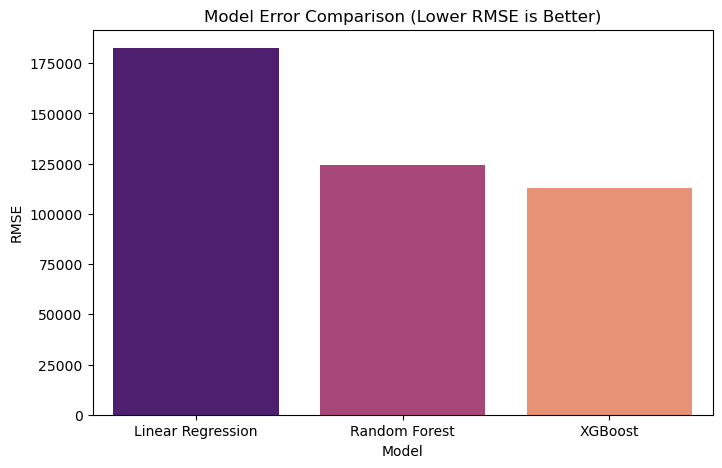

In [ ]:
# Model Comparison
results = pd.DataFrame([
    {"Model": "Linear Regression", **results_lr, **cv_results_lr},
    {"Model": "Random Forest", **results_rf, **cv_results_rf},
    {"Model": "XGBoost", **results_xgb, **cv_results_xgb}
])

display(results)

# R² comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=results, palette="viridis")
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

# RMSE comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results, palette="magma")
plt.title("Model Error Comparison (Lower RMSE is Better)")
plt.ylabel("RMSE")
plt.show()